In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('cust_satisfaction_train.csv')

In [3]:
train_df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [4]:
test_df = pd.read_csv("cust_satisfaction_test.csv")
test_df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [5]:
print(train_df.shape)
print(test_df.shape)

(76020, 371)
(75818, 370)


### Handling null values


In [6]:
nv_train = train_df.isnull().sum()
nv_train = nv_train[nv_train>0]
nv_train

Series([], dtype: int64)

In [7]:
nv_test = test_df.isnull().sum()
nv_test = nv_test[nv_test>0]
nv_test

Series([], dtype: int64)

In [8]:
# Checking duplicates
print(train_df.duplicated().sum())
print(test_df.duplicated().sum())

0
0


In [9]:
# Checking traget variable
train_df.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

In [10]:
r = train_df['TARGET'].value_counts()
r

0    73012
1     3008
Name: TARGET, dtype: int64

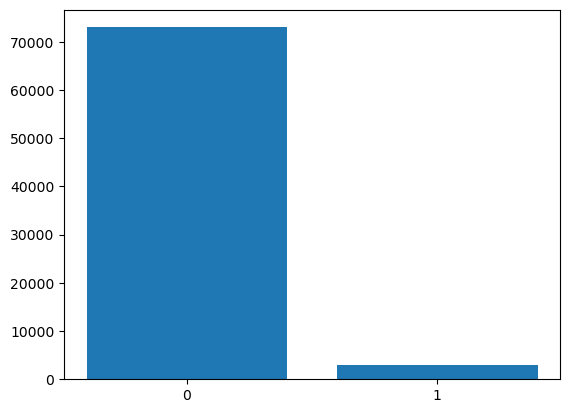

In [11]:
plt.bar(r.index,r)
plt.xticks(r.index)
plt.show()

In [12]:
# Checking column having only single category value
# Fetching and dropping the columns that has exactly a single values 
for i in train_df.columns:
    if train_df[i].nunique()==1:
        print(i)
        train_df.drop(i, inplace=True, axis=1)
        test_df.drop(i, inplace=True, axis=1)

ind_var2_0
ind_var2
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var41
ind_var46_0
ind_var46
num_var27_0
num_var28_0
num_var28
num_var27
num_var41
num_var46_0
num_var46
saldo_var28
saldo_var27
saldo_var41
saldo_var46
imp_amort_var18_hace3
imp_amort_var34_hace3
imp_reemb_var13_hace3
imp_reemb_var33_hace3
imp_trasp_var17_out_hace3
imp_trasp_var33_out_hace3
num_var2_0_ult1
num_var2_ult1
num_reemb_var13_hace3
num_reemb_var33_hace3
num_trasp_var17_out_hace3
num_trasp_var33_out_hace3
saldo_var2_ult1
saldo_medio_var13_medio_hace3


In [13]:
print(train_df.shape)
print(test_df.shape)

(76020, 337)
(75818, 336)


### EDA

### Plotting boxplot for the 16 faetures of train_data

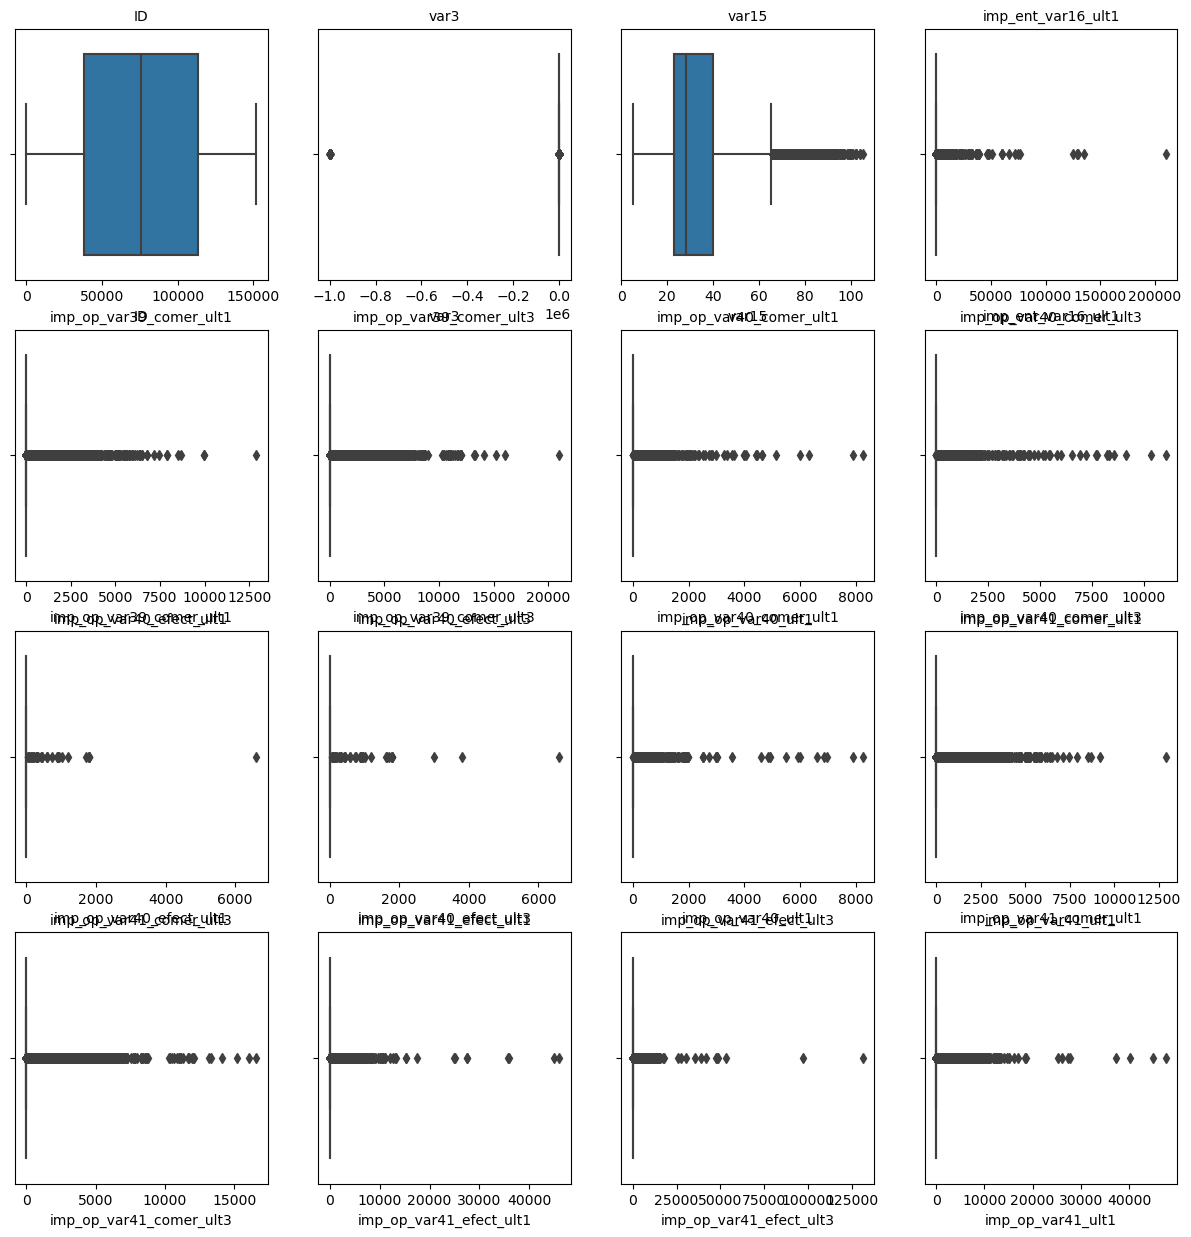

In [16]:
plt.figure(figsize=(15,15))
for i in range(16):
    plt.subplot(4,4,i+1)
    sns.boxplot(x=train_df.iloc[:,i]) # detect outliers
    plt.title(train_df.columns[i], size=10)
plt.show()

In [17]:
train_df.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=337)

### Univariate Statistical Analysis

In [18]:
train_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [19]:
test_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
count,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,...,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,7.581800e+04
mean,75874.830581,-1579.955011,33.138832,83.164329,74.312894,123.136448,4.578517,7.666855,0.470645,0.672444,...,0.160595,12.438559,1.327408,17.469991,12.674349,63.597839,11.404505,95.973025,70.504319,1.173863e+05
std,43882.370827,39752.473358,12.932000,1694.873886,364.211245,606.431562,133.383326,239.701416,34.028605,42.336668,...,32.441677,958.651673,170.449935,1252.618781,895.165516,3754.668954,1061.858193,4658.871575,3318.527783,2.479384e+05
min,2.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.600000,-0.600000,0.000000,0.000000,0.000000,0.000000,1.202730e+03
25%,37840.250000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.754961e+04
50%,75810.000000,2.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.057643e+05
75%,113996.500000,2.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.183159e+05
max,151837.000000,238.000000,105.000000,240000.000000,21093.960000,47943.960000,21093.960000,47943.960000,6600.000000,6600.000000,...,8030.160000,146605.320000,40080.600000,162355.800000,138054.960000,453893.400000,217762.230000,496198.080000,354260.730000,2.889440e+07


In [20]:
# Checking data types
train_df.dtypes.value_counts()

int64      226
float64    111
dtype: int64

In [21]:
test_df.dtypes.value_counts()

int64      226
float64    110
dtype: int64

In [22]:
# selecting features using correlation
corr_train = train_df.corr()
corr_train

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,1.000000,-0.001025,-0.002135,-0.003111,-0.001436,-0.004131,-0.007277,-0.006302,-0.006700,-0.006698,...,0.001986,0.003771,-0.001521,-0.001216,-0.003772,-0.003674,-0.000856,0.000297,-0.005687,0.003148
var3,-0.001025,1.000000,-0.004452,0.001868,0.005989,0.006817,0.001518,0.001690,0.000530,0.000611,...,0.000716,0.000491,0.000638,0.000669,0.000617,0.000508,0.000738,0.000778,0.000071,0.004475
var15,-0.002135,-0.004452,1.000000,0.043722,0.094762,0.101177,0.042754,0.048512,0.008805,0.009678,...,0.029358,0.017264,0.028504,0.029176,0.029180,0.018884,0.032833,0.033597,0.006497,0.101322
imp_ent_var16_ult1,-0.003111,0.001868,0.043722,1.000000,0.041221,0.034879,0.009896,0.009377,0.000592,0.002510,...,-0.000864,-0.000632,-0.000548,-0.000540,0.002655,-0.000612,0.005055,0.006590,0.000007,-0.000017
imp_op_var39_comer_ult1,-0.001436,0.005989,0.094762,0.041221,1.000000,0.886476,0.342709,0.295295,0.032280,0.054809,...,0.016422,0.011719,0.012570,0.013703,0.009445,0.005532,0.011665,0.010802,0.012546,0.010353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace3,-0.003674,0.000508,0.018884,-0.000612,0.005532,0.006359,-0.000480,-0.000529,-0.000170,-0.000195,...,-0.000219,-0.000151,-0.000196,-0.000205,0.332172,1.000000,0.229158,0.213191,0.003646,-0.002553
saldo_medio_var44_ult1,-0.000856,0.000738,0.032833,0.005055,0.011665,0.010660,-0.000254,-0.000510,-0.000254,-0.000292,...,0.000819,-0.000225,0.002493,0.002205,0.818300,0.229158,1.000000,0.968167,0.003258,-0.003104
saldo_medio_var44_ult3,0.000297,0.000778,0.033597,0.006590,0.010802,0.009822,-0.000372,-0.000601,-0.000268,-0.000308,...,0.000977,-0.000238,0.002905,0.002574,0.710593,0.213191,0.968167,1.000000,0.003037,-0.003015
var38,-0.005687,0.000071,0.006497,0.000007,0.012546,0.013271,0.016628,0.015584,-0.000315,0.000682,...,0.004448,0.001605,0.004255,0.004290,0.002889,0.003646,0.003258,0.003037,1.000000,-0.019510


In [28]:
# To find highly correlation
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return list(col_corr)

corr_features = correlation(train_df, 0.85)
print('Features with high correlation', corr_features)

Features with high correlation []


In [29]:
print(len(corr_features))

0


In [30]:
train_df.drop(columns=corr_features, axis=1, inplace=True)
test_df.drop(columns=corr_features, axis=1, inplace=True)
print(train_df.shape)
print(test_df.shape)

(76020, 146)
(75818, 145)


In [31]:
# Dropping ID Column
train_df1 = train_df.copy()
print(train_df1.shape)

(76020, 146)


In [32]:
train_df.drop('ID', axis=1, inplace=True)
test_df.drop('ID', axis=1, inplace=True)

In [34]:
print(train_df.shape)
print(test_df.shape)

(76020, 145)
(75818, 144)


In [35]:
# Select the dependent and independent faetures
x = train_df.drop('TARGET', axis=1)
y = train_df['TARGET']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(76020, 144)
(76020,)


In [36]:
# Dividing the data into training and testing data
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(57015, 144)
(19005, 144)
(57015,)
(19005,)


### Creating Functions to generate confusion_matrix, classification_report, accuracy_score, ROC_AUC_score and to compute training and testing score

In [39]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [69]:
d = {'Model':[], 'TP':[], 'FN':[], 'FP':[], 'TN':[],
    'Acc':[], 'AUC':[]}

def eval_model(model, model_name, x_test, ytest, ypred):
    cm = confusion_matrix(ytest, ypred)
    acc = accuracy_score(ytest, ypred)
    cls_rep = classification_report(ytest, ypred, zero_division=0)
    auc_score = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
    print('Confusion Matrix\n', cm)
    print('Accuracy Score', acc)
    print('AUC Score', auc_score)
    print('Classification Report\n', cls_rep)
    d['Model'].append(model_name)
    d['TP'].append(cm[0,0])
    d['FN'].append(cm[0,1])
    d['FP'].append(cm[1,0])
    d['TN'].append(cm[1,1])
    d['Acc'].append(acc)
    d['AUC'].append(auc_score)
    
def plot_roc_auc(model, ytest):
    fpr, tpr, thresh = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    auc_score = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
    print('Area Under Curve',auc_score)
    plt.plot(fpr, tpr, color='orange')
    plt.plot([0,1],[0,1], label='TPR=FPR')
    plt.title('ROC_AUC_Curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.grid()
    plt.legend()
    plt.show()
    
def mscore(model):
    print('Training Score', model.score(x_train, y_train))
    print('Testing Score', model.score(x_test, y_test))

### Applying Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
# Building the model LogReg library
log_reg = LogisticRegression(max_iter=100000, solver='liblinear')
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=100000, solver='liblinear')

In [72]:
mscore(log_reg)

Training Score 0.9606068578444269
Testing Score 0.9599052880820836


In [73]:
ypred_logreg = log_reg.predict(x_test)
print(ypred_logreg)

[0 0 0 ... 0 0 0]


In [74]:
eval_model(log_reg, 'Log_Reg', x_test, y_test, ypred_logreg)

Confusion Matrix
 [[18243     0]
 [  762     0]]
Accuracy Score 0.9599052880820836
AUC Score 0.5947572311560052
Classification Report
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     18243
           1       0.00      0.00      0.00       762

    accuracy                           0.96     19005
   macro avg       0.48      0.50      0.49     19005
weighted avg       0.92      0.96      0.94     19005



Area Under Curve 0.5947572311560052


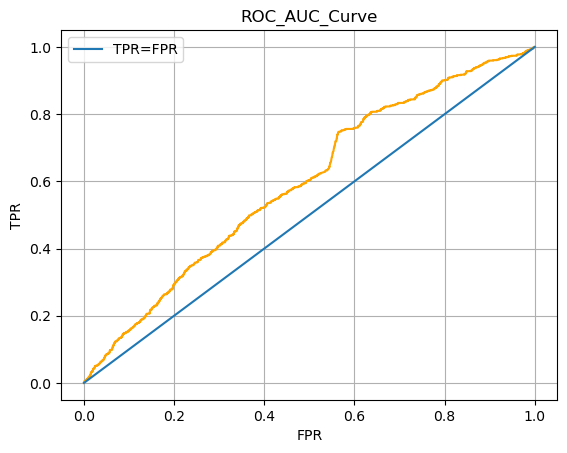

In [75]:
plot_roc_auc(log_reg, y_test)

### Applying Decision Tree Classifier 

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
dt = DecisionTreeClassifier(criterion='gini', min_samples_split=50, max_depth=10)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=50)

In [78]:
mscore(dt)

Training Score 0.9619047619047619
Testing Score 0.9584846093133386


In [79]:
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[0 0 0 ... 0 0 0]


In [80]:
eval_model(dt, 'DT', x_test, y_test, ypred_dt)

Confusion Matrix
 [[18208    35]
 [  754     8]]
Accuracy Score 0.9584846093133386
AUC Score 0.793988144591612
Classification Report
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     18243
           1       0.19      0.01      0.02       762

    accuracy                           0.96     19005
   macro avg       0.57      0.50      0.50     19005
weighted avg       0.93      0.96      0.94     19005



Area Under Curve 0.793988144591612


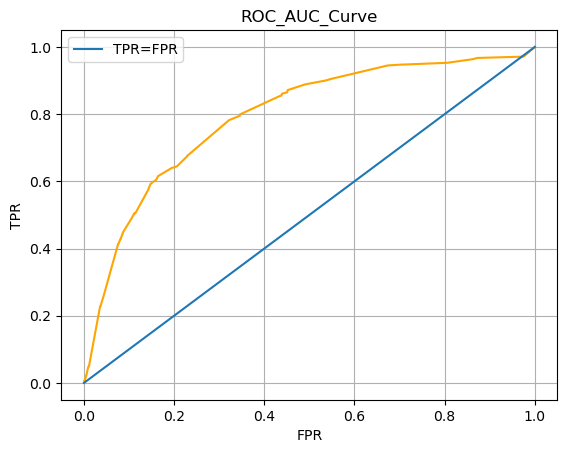

In [81]:
plot_roc_auc(dt, y_test)

### Applying RandomForest Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rf = RandomForestClassifier(n_estimators=80, criterion='gini', min_samples_split=50, max_depth=10)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=50, n_estimators=80)

In [84]:
mscore(rf)

Training Score 0.960641936332544
Testing Score 0.9599052880820836


In [85]:
ypred_rf = rf.predict(x_test)
print(ypred_rf)

[0 0 0 ... 0 0 0]


In [86]:
eval_model(rf, 'Random Forest', x_test, y_test, ypred_rf)

Confusion Matrix
 [[18243     0]
 [  762     0]]
Accuracy Score 0.9599052880820836
AUC Score 0.8134038900046227
Classification Report
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     18243
           1       0.00      0.00      0.00       762

    accuracy                           0.96     19005
   macro avg       0.48      0.50      0.49     19005
weighted avg       0.92      0.96      0.94     19005



Area Under Curve 0.8134038900046227


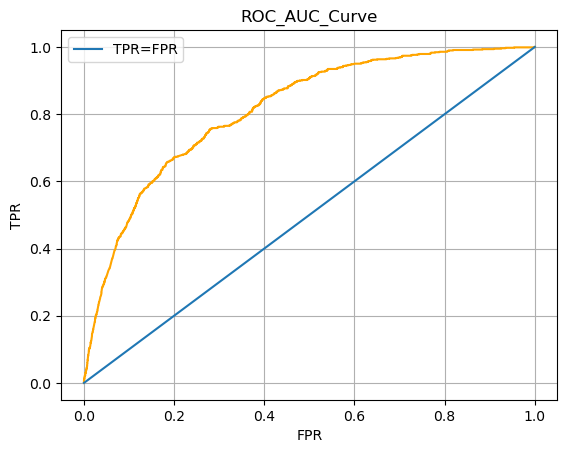

In [87]:
plot_roc_auc(rf, y_test)

### Ensemble Learning

In [88]:
from sklearn.ensemble import AdaBoostClassifier

In [89]:
adab = AdaBoostClassifier(n_estimators=70)
adab.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=70)

In [90]:
mscore(adab)

Training Score 0.9606068578444269
Testing Score 0.959642199421205


In [91]:
ypred_adab = adab.predict(x_test)
print(ypred_adab)

[0 0 0 ... 0 0 0]


In [92]:
eval_model(adab, 'AdaBoost', x_test, y_test, ypred_adab)

Confusion Matrix
 [[18234     9]
 [  758     4]]
Accuracy Score 0.959642199421205
AUC Score 0.824064434594911
Classification Report
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     18243
           1       0.31      0.01      0.01       762

    accuracy                           0.96     19005
   macro avg       0.63      0.50      0.49     19005
weighted avg       0.93      0.96      0.94     19005



Area Under Curve 0.824064434594911


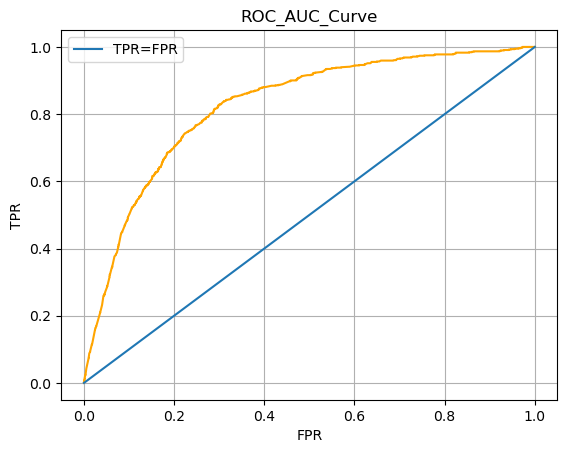

In [93]:
plot_roc_auc(adab, y_test)

### Comparing different classification Models

In [94]:
print(d)

{'Model': ['Log_Reg', 'DT', 'Random Forest', 'AdaBoost'], 'TP': [18243, 18208, 18243, 18234], 'FN': [0, 35, 0, 9], 'FP': [762, 754, 762, 758], 'TN': [0, 8, 0, 4], 'Acc': [0.9599052880820836, 0.9584846093133386, 0.9599052880820836, 0.959642199421205], 'AUC': [0.5947572311560052, 0.793988144591612, 0.8134038900046227, 0.824064434594911]}


In [95]:
model_performance = pd.DataFrame(d)
model_performance

,Model,TP,FN,FP,TN,Acc,AUC
0,Log_Reg,18243,0,762,0,0.959905,0.594757
1,DT,18208,35,754,8,0.958485,0.793988
2,Random Forest,18243,0,762,0,0.959905,0.813404
3,AdaBoost,18234,9,758,4,0.959642,0.824064


### Generating Predictions on Test data using AdaBoost Classifier

In [96]:
print(x_train.shape)
print(x_test.shape)
print(x.shape)
print(y.shape)

(57015, 144)
(19005, 144)
(76020, 144)
(76020,)


### Final model (AdaBosst Classifier) based on Evaluation from model performance dataframe

In [98]:
model = AdaBoostClassifier(n_estimators=70)
model.fit(x,y)

AdaBoostClassifier(n_estimators=70)

In [99]:
test_df.shape

(75818, 144)

In [101]:
# Generating predictions on the test_df
ypred = model.predict(test_df)

In [102]:
# Adding the prediction results to the sample_submission file

In [103]:
sample = pd.read_csv('sample_submission.csv')
sample.shape

(75818, 2)

In [104]:
sample.columns

Index(['ID', 'TARGET'], dtype='object')

In [105]:
sample.head()

,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0


In [106]:
sample['TARGET'].value_counts()

0    75818
Name: TARGET, dtype: int64

In [107]:
sample['TARGET'] = ypred
sample.head()

,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0


In [108]:
sample['TARGET'].value_counts()

0    75768
1       50
Name: TARGET, dtype: int64

In [109]:
sample.to_csv('sample_submission_major_proj.csv')

In [111]:
# Save the model
import pickle

In [112]:
pickle.dump(model, open('sat_predict.pkl', 'wb'))

In [113]:
# Load the model
loaded_model = pickle.load(open('sat_predict.pkl', 'rb'))


In [114]:
satisfaction_pred = loaded_model.predict(test_df)

In [115]:
print(satisfaction_pred)

[0 0 0 ... 0 0 0]
